In [77]:
import numpy as np
import pandas as pd
# 從 keras.utils 匯入 to_categroical，因為後續要將 label 標籤 轉換成 one-hot encoding。
from tensorflow.keras.utils import to_categorical
# 設定 seed 可以讓每次產生隨機值時，都會有相同的輸出。(若使用GPU，則無法每次皆相同)
seed = 1234
np.random.seed(seed)

from tensorflow.keras import layers, metrics
from tensorflow.keras.layers import Dense,InputLayer,Flatten
from tensorflow.keras import models
import tensorflow as tf
tf.random.set_seed(seed)


from tensorflow.keras.datasets import mnist,cifar10
(X_train_image, y_train_label),\
    (X_test_image, y_test_label) = mnist.load_data()

import matplotlib.pyplot as plt
def plot_image(image):
    # 設定圖形顯示大小
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    # 使用 plt.imshow() 顯示圖像，傳入參數是 28 X 28 的圖形，
    # cmap 參數設定為 binary 以黑白灰階顯示
    plt.imshow(image, cmap = 'binary')
    # 開始繪圖
    plt.show()

def plot_images_labels_prediction(images, labels, prediction,idx, num = 10):

    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    # 如果顯示筆數大於25 則將他設定為25 以避免錯誤
    if num > 25: num = 25
    # 使用 for 迴圈依序畫出 num 個數字圖形
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i) # 建立 5 X 5 的 subgraph 子圖形
        ax.imshow(images[idx], cmap = 'binary') # 畫出 subgraph 子圖形
        title = "label=" + str(labels[idx]) # 設定子圖形 title 顯示標籤欄位
        if len(prediction) > 0: # 如果 prediction 有傳入值
            title += ",predict=" + str(prediction[idx]) # 將 prediction 加入 title
        ax.set_title(title, fontsize = 12) # 設定標題大小
        ax.set_xticks([]); ax.set_yticks([]) # 設定不顯示刻度
        idx += 1 # 讀取下一筆
    plt.show() # 開始畫圖

X_Train = X_train_image.astype('float32')
X_Test = X_test_image.astype('float32')
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255

y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)

model = models.Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(32,  kernel_initializer = 'random_uniform',activation = 'sigmoid'))
model.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


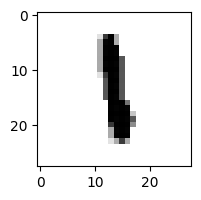

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  29 197 255  84   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85 251 253  83   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86 253 254 253   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85 251 253 251   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86 253 254 253 16

In [78]:
plot_image(X_train_image[200])
print(X_train_image[200])

In [79]:
loss_function = 'CategoricalCrossentropy'
optimize_function = 'Adam'
model.compile(loss = loss_function, optimizer = optimize_function,metrics = ['accuracy'])

train_history = model.fit(x = X_Train_normalize, y = y_TrainOneHot,
                            validation_split = 0.2, epochs = 30, batch_size = 200,
                            verbose = 2)


Epoch 1/30
240/240 - 1s - loss: 1.5115 - accuracy: 0.7088 - val_loss: 0.8492 - val_accuracy: 0.8611 - 1s/epoch - 5ms/step
Epoch 2/30
240/240 - 1s - loss: 0.6434 - accuracy: 0.8768 - val_loss: 0.4754 - val_accuracy: 0.8971 - 558ms/epoch - 2ms/step
Epoch 3/30
240/240 - 0s - loss: 0.4320 - accuracy: 0.8995 - val_loss: 0.3636 - val_accuracy: 0.9119 - 470ms/epoch - 2ms/step
Epoch 4/30
240/240 - 1s - loss: 0.3512 - accuracy: 0.9114 - val_loss: 0.3122 - val_accuracy: 0.9193 - 511ms/epoch - 2ms/step
Epoch 5/30
240/240 - 0s - loss: 0.3072 - accuracy: 0.9187 - val_loss: 0.2818 - val_accuracy: 0.9244 - 493ms/epoch - 2ms/step
Epoch 6/30
240/240 - 1s - loss: 0.2775 - accuracy: 0.9247 - val_loss: 0.2595 - val_accuracy: 0.9288 - 566ms/epoch - 2ms/step
Epoch 7/30
240/240 - 0s - loss: 0.2559 - accuracy: 0.9300 - val_loss: 0.2445 - val_accuracy: 0.9335 - 474ms/epoch - 2ms/step
Epoch 8/30
240/240 - 1s - loss: 0.2389 - accuracy: 0.9345 - val_loss: 0.2313 - val_accuracy: 0.9375 - 698ms/epoch - 3ms/step
Epo

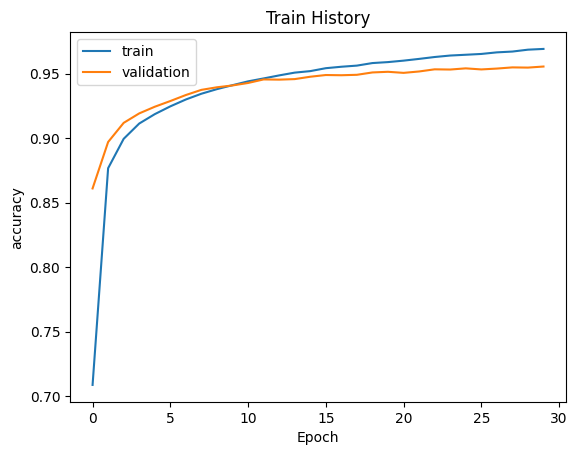

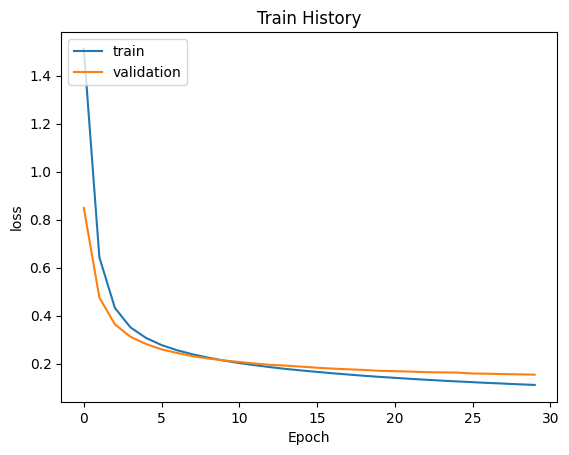

In [80]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [81]:
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print('accuracy = ', scores[1])
prediction = np.argmax(model.predict(X_Test), axis = -1)


313/313 [==============================] - 0s 1ms/step - loss: 0.1517 - accuracy: 0.9553

accuracy =  0.955299973487854
313/313 [==============================] - 0s 1ms/step


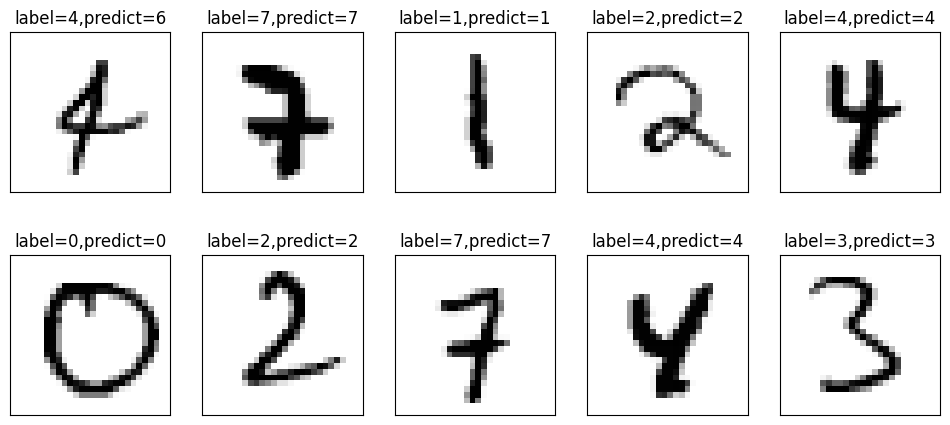

In [82]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx = 300)

In [83]:
import numpy as np
from google.colab import files #匯入套件
import pandas as pd
from PIL import Image, ImageOps
import os
import matplotlib.pyplot as plt
from google.colab import drive

img_data = Image.open('/content/drive/MyDrive/lab14_2.jpg')
newImg = ImageOps.invert(img_data)
img_arr = np.array(newImg)

list1 = []
for i in range(len(img_arr)):
  joe = []
  for j in range(len(img_arr[i])):
    sum = img_arr[i][j][0]+img_arr[i][j][1]+img_arr[i][j][2]
    joe.append(sum)
  list1.append(joe)
ha = [list1]
img_list = np.array(ha)

print(img_list)



[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   3   3   3   3   3   3   3   3   3
     3   3   3   3   3   3   3   0   0   0   0]
  [  0   0   0   0   0   0   0   0   3   3   3   3   3   3   3   3   3
     3   3   3   3   3   3   3   0   0   0   0]
  [  0   0   0   0   0   0   3   3   3 147 206  

<ipython-input-83-2ec60a020fdb>:17: RuntimeWarning: overflow encountered in ubyte_scalars
  sum = img_arr[i][j][0]+img_arr[i][j][1]+img_arr[i][j][2]


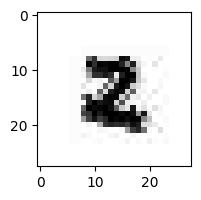

In [84]:
plot_image(img_list[0])

In [85]:
prediction_2 = np.argmax(model.predict(img_list), axis = -1)
prediction_2

1/1 [==============================] - 0s 40ms/step


array([2])

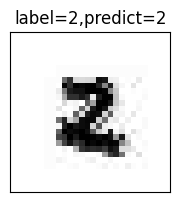

In [86]:
img_Train = img_list.astype('float32')
img_Train_normalize = img_Train / 255
plot_images_labels_prediction(img_list,[2], prediction_2,idx=0,num=1)